In [2]:
from blackhc import mdp
import numpy as np

# Rock-Paper-Scissor Game
## 1. Form 1, two-player game to one-player game

In [6]:
action_set = ['r', 'p', 's']
num_actions = len(action_set)
spec = mdp.MDPSpec()
start = spec.state('start')
end = spec.state('end', terminal_state=True)

mutual_actions = []
for a in action_set:
    for b in action_set:
        mutual_actions.append(spec.action())
print(mutual_actions)

payoff_matrix = [[0,1,-1],
                [-1,0,1],
                [-1,1,0]]
payoff_vector = np.array(payoff_matrix).reshape(-1)
# reward for the first player:
for action, reward in zip(mutual_actions, payoff_vector):
    spec.transition(start, action, mdp.NextState(end))
    spec.transition(start, action, mdp.Reward(reward))

[Action(A0, 0), Action(A1, 1), Action(A2, 2), Action(A3, 3), Action(A4, 4), Action(A5, 5), Action(A6, 6), Action(A7, 7), Action(A8, 8)]


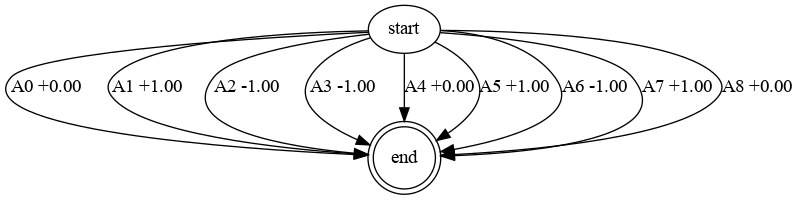

In [7]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

## 2. Form 2, two-player game

In [26]:
action_set = ['r', 'p', 's']
num_actions = len(action_set)
spec = mdp.MDPSpec()
start = spec.state('start/player1')
mid = spec.state('player2')
end = spec.state('end', terminal_state=True)

p1_actions = []
p2_actions = []
for _ in action_set:
    p1_actions.append(spec.action())

for a1 in p1_actions:
    spec.transition(start, a1, mdp.NextState(mid))
for a2 in p1_actions:
    spec.transition(mid, a2, mdp.NextState(end))
print(spec.transition)

<bound method MDPSpec.transition of Mdp(states=[State(start/player1, 0, False), State(player2, 1, False), State(end, 2, True)], actions=[Action(A0, 0), Action(A1, 1), Action(A2, 2)], state_outcomes={(State(start/player1, 0, False), Action(A0, 0)): [NextState(State(player2, 1, False), 1.0)], (State(start/player1, 0, False), Action(A1, 1)): [NextState(State(player2, 1, False), 1.0)], (State(start/player1, 0, False), Action(A2, 2)): [NextState(State(player2, 1, False), 1.0)], (State(player2, 1, False), Action(A0, 0)): [NextState(State(end, 2, True), 1.0)], (State(player2, 1, False), Action(A1, 1)): [NextState(State(end, 2, True), 1.0)], (State(player2, 1, False), Action(A2, 2)): [NextState(State(end, 2, True), 1.0)]}, reward_outcomes={})>


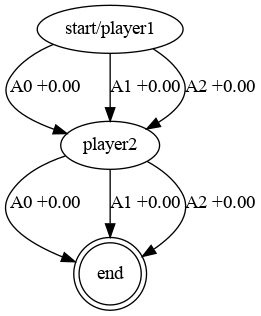

In [27]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

# Two-Player Combinatorial Lock

In [28]:
action_set = ['a0', 'a1']
num_actions = len(action_set)
layers = 5
pos_reward = 1
spec = mdp.MDPSpec()
start = spec.state('start')
mid_states = []
for i in range(layers):
    # each layer has a good and bad state
    if i == layers-1:
        mid_states.append([spec.state(f'good_{i+1}', terminal_state=True), spec.state(f'bad_{i+1}', terminal_state=True)])
    else:
        mid_states.append([spec.state(f'good_{i+1}'), spec.state(f'bad_{i+1}')])

mutual_actions = []
for a in action_set:
    for b in action_set:
        mutual_actions.append(spec.action())
print(mutual_actions)

spec.transition(start, mutual_actions[0], mdp.NextState(mid_states[0][0]))
spec.transition(start, mutual_actions[3], mdp.NextState(mid_states[0][0]))
spec.transition(start, mutual_actions[1], mdp.NextState(mid_states[0][1]))
spec.transition(start, mutual_actions[2], mdp.NextState(mid_states[0][1]))

for i in range(layers-1):
    if i == layers-2:
        spec.transition(mid_states[i][0], mutual_actions[0], mdp.Reward(pos_reward))
        spec.transition(mid_states[i][0], mutual_actions[3], mdp.Reward(pos_reward))

    spec.transition(mid_states[i][0], mutual_actions[0], mdp.NextState(mid_states[i+1][0]))
    spec.transition(mid_states[i][0], mutual_actions[3], mdp.NextState(mid_states[i+1][0]))
    spec.transition(mid_states[i][0], mutual_actions[1], mdp.NextState(mid_states[i+1][1]))
    spec.transition(mid_states[i][0], mutual_actions[2], mdp.NextState(mid_states[i+1][1]))

    spec.transition(mid_states[i][1], mutual_actions[0], mdp.NextState(mid_states[i+1][1]))
    spec.transition(mid_states[i][1], mutual_actions[3], mdp.NextState(mid_states[i+1][1]))
    spec.transition(mid_states[i][1], mutual_actions[1], mdp.NextState(mid_states[i+1][1]))
    spec.transition(mid_states[i][1], mutual_actions[2], mdp.NextState(mid_states[i+1][1]))




[Action(A0, 0), Action(A1, 1), Action(A2, 2), Action(A3, 3)]


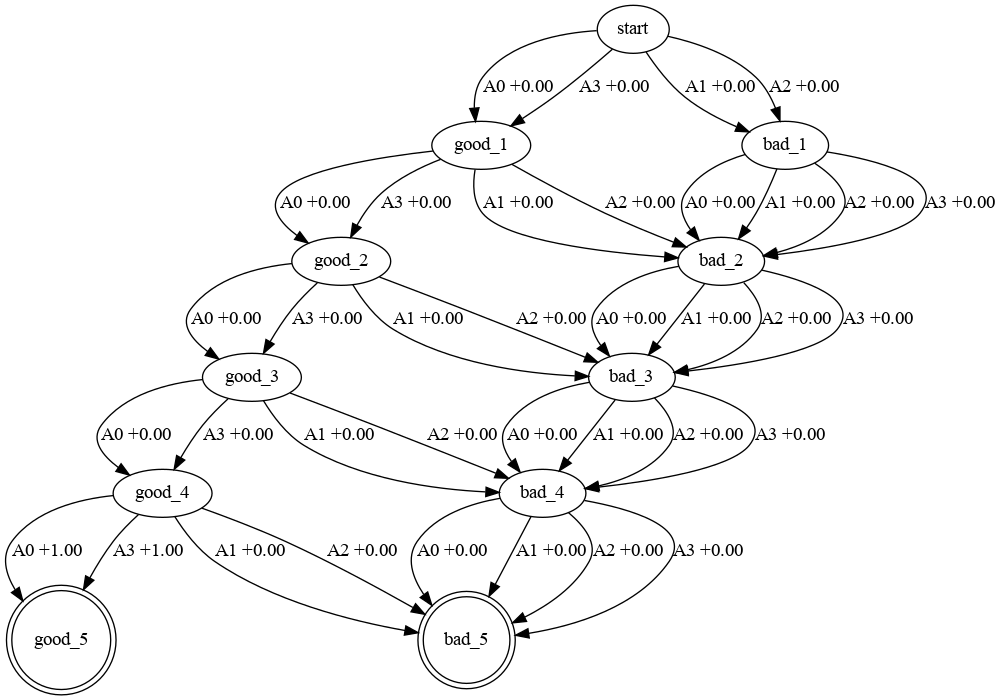

In [29]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

In [30]:
env = spec.to_env()
# env.reset()
# print(obs)
# for i in range(layers):
#     obs, r, d, _ = env.step(0)
#     print(obs, r, d)


In [31]:
env.reset()

NotImplementedError: 

In [25]:
from blackhc import mdp
from blackhc.mdp import example

env = example.MULTI_ROUND_NDMP.to_env()

env.reset()
env.render()

is_done = False
while not is_done:
    state, reward, is_done, _ = env.step(env.action_space.sample())
    env.render()

NotImplementedError: 

In [4]:
import numpy as np

a=np.array([np.array([1,2]), 3, np.array([[2, 2]])])

b=[np.array([1,2]),2]
np.isnan(b).all()

False